<h2 align="center">AtliQ CreditCard Project<h2>

In [44]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [28]:
df_customers = pd.read_csv("data/customers.csv")
df_customers.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [29]:
df_transactions = pd.read_csv("data/transactions.csv")
df_transactions.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [30]:
df_credit_profile = pd.read_csv("data/credit_profiles.csv")
df_credit_profile.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [31]:
df_customers.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


In [32]:
df_customers.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [33]:
df_customers[df_customers['annual_income'].isna()].head(4)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married


In [34]:
df_customers['annual_income'].median()

np.float64(112218.5)

In [35]:
# Median annual income might be different based on the occupation
occupation_wise_inc_median = df_customers.groupby("occupation")["annual_income"].median()

In [26]:
def get_median_val(row):
    if pd.isnull(row["annual_income"]):
        return occupation_wise_inc_median[row["occupation"]]
    else:
        row["annual_income"]
   

In [ ]:
#df_customers["annual_income"] = df_customers.apply(get_median_val,axis=1)

In [37]:
# We can use Lamda function to do same 
df_customers["annual_income"] = df_customers.apply(
    lambda row : occupation_wise_inc_median[row["occupation"]] if pd.isnull(row["annual_income"])
    else row["annual_income"], axis=1
)   


In [38]:
df_customers.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [42]:
df_customers.iloc[[14,82]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,45794.0,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,46759.0,Single


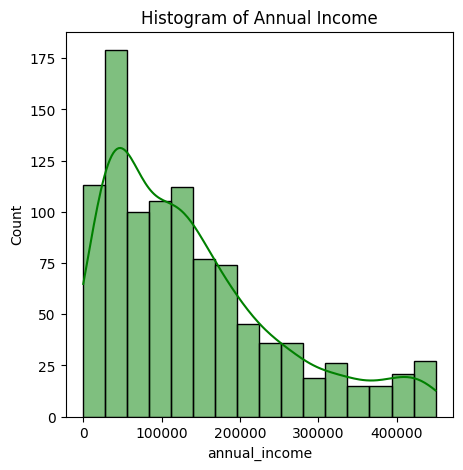

In [46]:
plt.figure(figsize=(5,5))
sns.histplot(df_customers["annual_income"],kde=True, color='green',label='Data')
plt.title("Histogram of Annual Income")
plt.show()

In [47]:
df_customers.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


In [48]:
df_customers[df_customers["annual_income"] < 100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


In [49]:
for index, row in df_customers.iterrows() :
    if row["annual_income"] < 100 :
        df_customers.at[index, "annual_income"] = occupation_wise_inc_median[row["occupation"]]

In [50]:
# Check now any one has income less than 100
df_customers[df_customers["annual_income"] < 100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [51]:
avg_income_per_occupation = df_customers.groupby("occupation")["annual_income"].mean()
avg_income_per_occupation

occupation
Accountant              64123.562500
Artist                  45309.236842
Business Owner         268447.368512
Consultant              60703.154639
Data Scientist         137021.266304
Freelancer              76327.508772
Fullstack Developer     78727.972973
Name: annual_income, dtype: float64

In [52]:
avg_income_per_occupation.values

array([ 64123.5625    ,  45309.23684211, 268447.36851211,  60703.15463918,
       137021.26630435,  76327.50877193,  78727.97297297])

In [53]:
avg_income_per_occupation.index

Index(['Accountant', 'Artist', 'Business Owner', 'Consultant',
       'Data Scientist', 'Freelancer', 'Fullstack Developer'],
      dtype='object', name='occupation')

/var/folders/1d/w72pys2d2q58j17kf_kg6h300000gr/T/ipykernel_1076/3755923913.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_per_occupation.index, y=avg_income_per_occupation.values,palette="tab10")


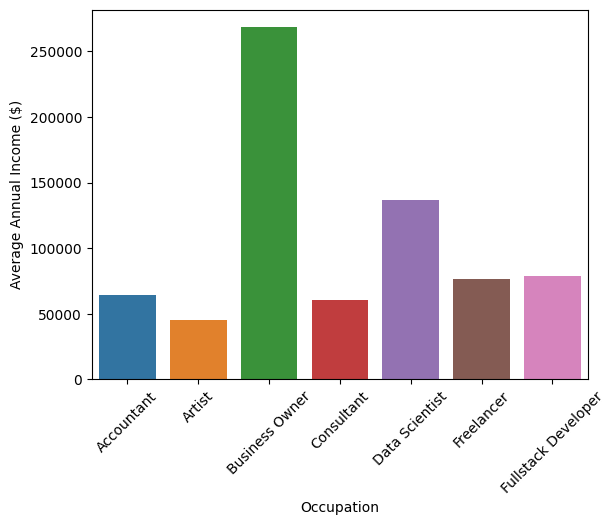

In [60]:
sns.barplot(x=avg_income_per_occupation.index, y=avg_income_per_occupation.values,palette="tab10")
plt.xticks(rotation=45)
plt.xlabel("Occupation")
plt.ylabel("Average Annual Income ($)")
plt.show()

In [59]:
categorical_columns = ["gender","location","occupation","marital_status"]

/var/folders/1d/w72pys2d2q58j17kf_kg6h300000gr/T/ipykernel_1076/2548253526.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_per_group.index, y=avg_income_per_group.values,palette="tab10")


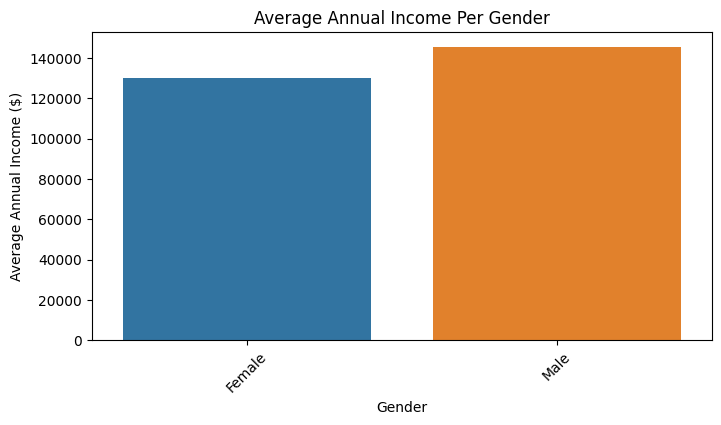

/var/folders/1d/w72pys2d2q58j17kf_kg6h300000gr/T/ipykernel_1076/2548253526.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_per_group.index, y=avg_income_per_group.values,palette="tab10")


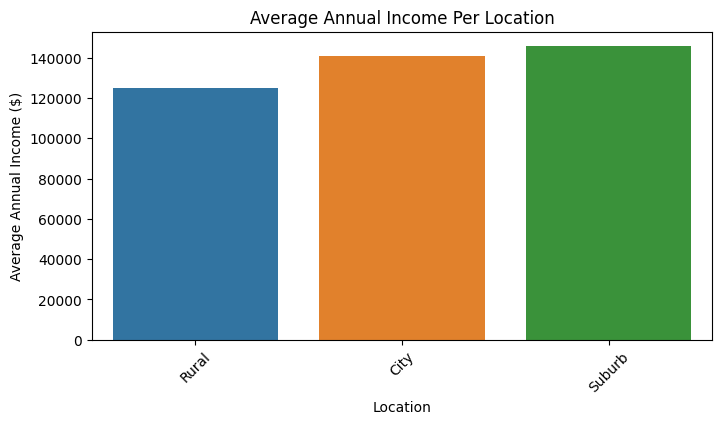

/var/folders/1d/w72pys2d2q58j17kf_kg6h300000gr/T/ipykernel_1076/2548253526.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_per_group.index, y=avg_income_per_group.values,palette="tab10")


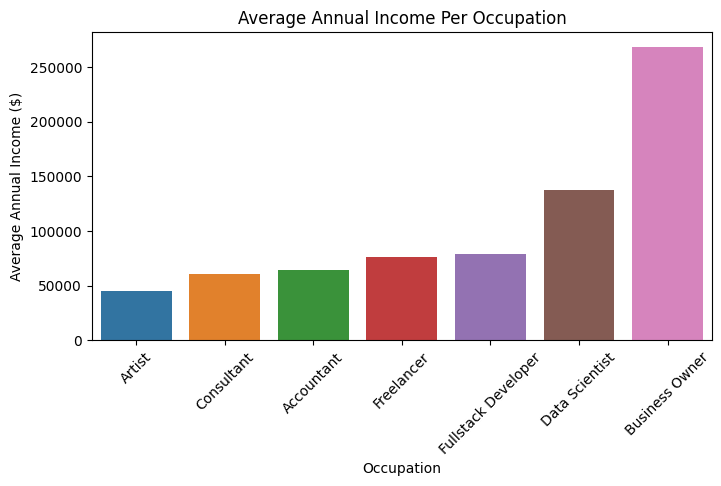

/var/folders/1d/w72pys2d2q58j17kf_kg6h300000gr/T/ipykernel_1076/2548253526.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_per_group.index, y=avg_income_per_group.values,palette="tab10")


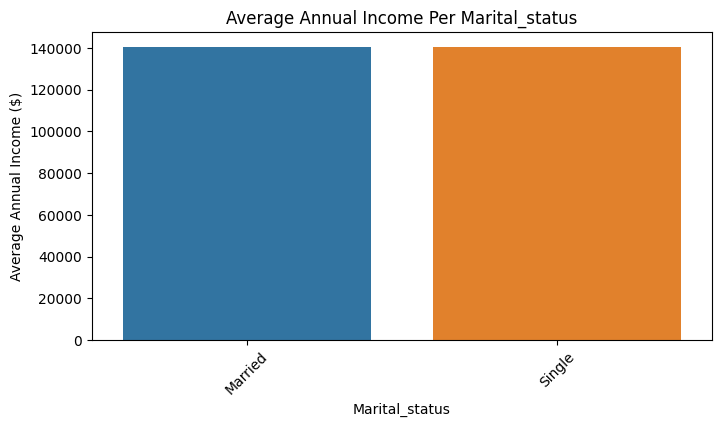

In [63]:
for col in categorical_columns:
    plt.figure(figsize=(8,4))
    avg_income_per_group = df_customers.groupby(col)['annual_income'].mean().sort_values()
    sns.barplot(x=avg_income_per_group.index, y=avg_income_per_group.values,palette="tab10")
    plt.xticks(rotation=45)
    plt.title(f'Average Annual Income Per {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel("Average Annual Income ($)")    
    plt.show()   

### <b>Handle Null Values: Age Column<b>

In [64]:
df_customers.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [65]:
df_customers.age.describe()

count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

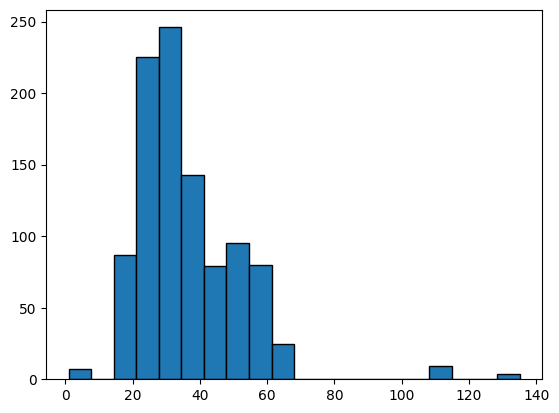

In [68]:
plt.hist(df_customers.age,bins=20,edgecolor="black")
plt.show()

In [74]:
outliers_by_age = df_customers[(df_customers.age<15) | (df_customers.age >80)]
outliers_by_age

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [75]:
# We will replace outliers with occupation median age value
occupation_age_median = df_customers.groupby("occupation")["age"].median()

In [76]:
for index, row in outliers_by_age.iterrows() :
    df_customers.at[index,'age'] = occupation_age_median[row["occupation"]]

/var/folders/1d/w72pys2d2q58j17kf_kg6h300000gr/T/ipykernel_1076/937720620.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '31.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_customers.at[index,'age'] = occupation_age_median[row["occupation"]]


In [77]:
df_customers.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,35.541500,140483.548500
std,288.819436,12.276634,110463.002934
min,1.000000,18.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,44.250000,195514.250000
max,1000.000000,64.000000,449346.000000


In [79]:
bin_edges = [17,25,48,65]
bin_labels = ['18-25','26-48','48-65']

df_customers['age_group'] = pd.cut(df_customers['age'],bins=bin_edges,labels=bin_labels)

In [80]:
df_customers.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,48-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [84]:
age_group_count = df_customers.age_group.value_counts(normalize=True)*100
age_group_count

age_group
26-48    56.7
18-25    24.6
48-65    18.7
Name: proportion, dtype: float64

In [85]:
type(age_group_count)

pandas.core.series.Series

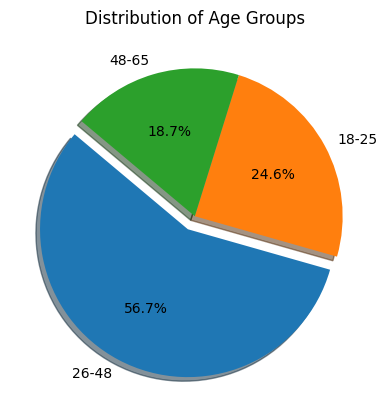

In [93]:
plt.pie(age_group_count,labels=age_group_count.index,autopct='%1.1f%%',shadow=True,
        explode=(0.1,0,0),startangle=140)
plt.title("Distribution of Age Groups")
plt.show()

In [94]:
df_customers.location.value_counts()

location
City      683
Suburb    232
Rural      85
Name: count, dtype: int64

In [95]:
df_customers.gender.value_counts()

gender
Male      674
Female    326
Name: count, dtype: int64

In [98]:
cusomer_location_gender = df_customers.groupby(['location','gender']).size().unstack()
cusomer_location_gender

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


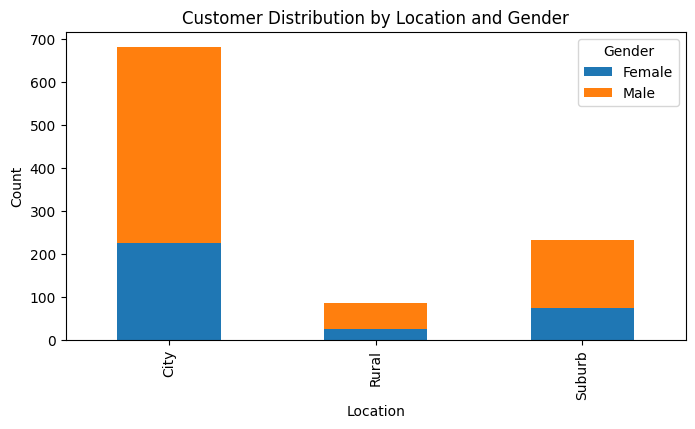

In [105]:
cusomer_location_gender.plot(kind="bar",stacked=True,figsize=(8,4))
plt.legend(title="Gender")
plt.title("Customer Distribution by Location and Gender")
plt.xlabel("Location")
plt.ylabel("Count")
plt.show()

In [106]:
df_credit_profile.shape

(1004, 6)

In [107]:
df_credit_profile['cust_id'].nunique()

1000

In [108]:
df_credit_profile[df_credit_profile['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [ ]:
# We delete the duplicates and kept last records
df_credit_profile_new = df_credit_profile.drop_duplicates(subset="cust_id",keep="last")

In [110]:
df_credit_profile_new.shape

(1000, 6)

In [111]:
df_credit_profile_new.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [112]:
df_credit_profile_new[df_credit_profile_new['credit_limit'].isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [113]:
df_credit_profile_new.credit_limit.value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

/var/folders/1d/w72pys2d2q58j17kf_kg6h300000gr/T/ipykernel_1076/3795253680.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


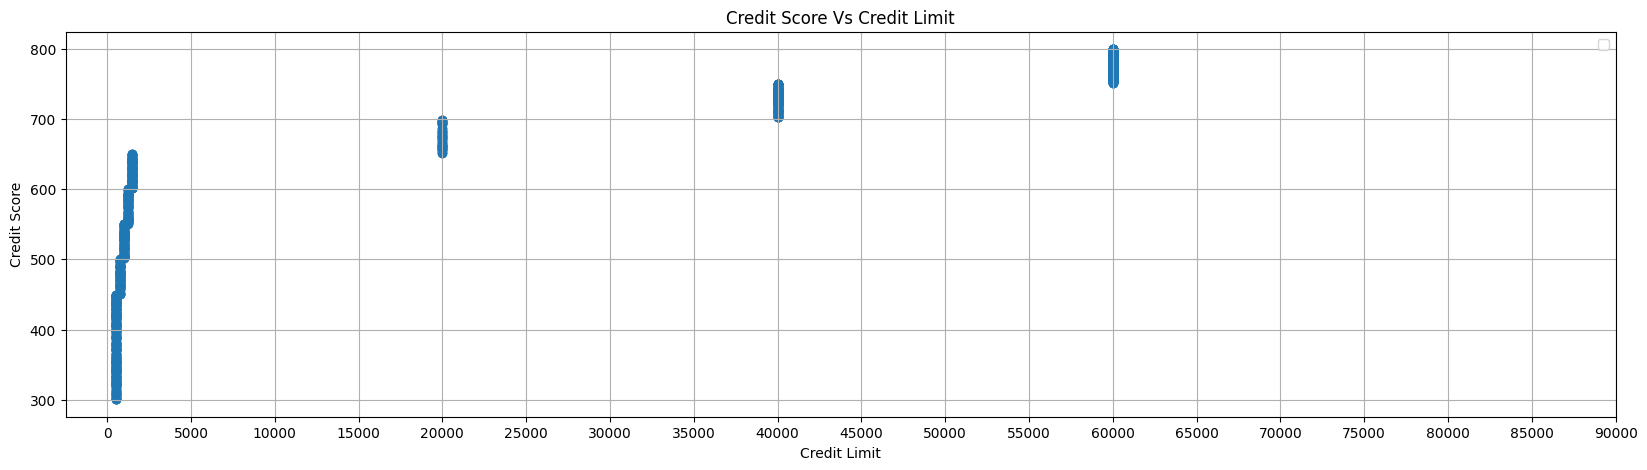

In [122]:
plt.figure(figsize=(20,5))
plt.scatter(df_credit_profile_new['credit_limit'],df_credit_profile_new['credit_score'])
plt.title("Credit Score Vs Credit Limit")
plt.xlabel("Credit Limit")
plt.ylabel("Credit Score")
plt.xticks(range(0,90001,5000))
plt.grid(True)
plt.legend()
plt.show()

In [134]:
bin_ranges_cs = [300,450,500,550,600,650,700,750,800]
bin_label_cs = [f'{start}-{end-1}' for start, end in zip(bin_ranges_cs,bin_ranges_cs[1:])]

df_credit_profile_new['credit_score_range']= pd.cut(df_credit_profile_new['credit_score'],
                                                    bins=bin_ranges_cs,
                                                    labels=bin_label_cs,
                                                    include_lowest=True,right=False)

/var/folders/1d/w72pys2d2q58j17kf_kg6h300000gr/T/ipykernel_1076/1827158031.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_credit_profile_new['credit_score_range']= pd.cut(df_credit_profile_new['credit_score'],


In [137]:
df_credit_profile_new.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


In [139]:

df_credit_profile_new[df_credit_profile_new['credit_score_range'] == '700-749']

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
4,5,708,0.586151,18090.0,2.0,40000.0,700-749
6,7,747,0.523965,15544.0,4.0,40000.0,700-749
16,17,702,0.894423,18444.0,0.0,40000.0,700-749
27,28,729,0.149748,3453.0,2.0,40000.0,700-749
...,...,...,...,...,...,...,...
969,966,720,0.203742,6159.0,4.0,40000.0,700-749
970,967,739,0.845474,23929.0,4.0,40000.0,700-749
991,988,739,0.435891,9283.0,4.0,40000.0,700-749
994,991,709,0.718484,15473.0,4.0,40000.0,700-749


In [141]:
df_credit_profile_new.groupby('credit_score_range')['credit_limit'].median()

/var/folders/1d/w72pys2d2q58j17kf_kg6h300000gr/T/ipykernel_1076/1018131834.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_credit_profile_new.groupby('credit_score_range')['credit_limit'].median()


credit_score_range
300-449      500.0
450-499      750.0
500-549     1000.0
550-599     1250.0
600-649     1500.0
650-699    20000.0
700-749    40000.0
750-799    60000.0
Name: credit_limit, dtype: float64